In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Decision tree model

In dit gedeelte wordt een decision tree model gemaakt. Allereerst moeten we weten wat een decision tree model is, en hoe het werkt. Een decision tree model is een vorm van supervised machine learning. In dit geval wordt een decision tree classifier gebruikt omdat dit een classificatie probleem is. Het werkt door de dataset recursief te verdelen in "vertakkingen" op basis van de waarden van de invoerfuncties. Deze splitsingen creëren een structuur die op een boom lijkt, waarbij elke vertakking een beslissing of een test op een kenmerk vertegenwoordigt. En op die gesplitste data wordt weer een beslissing genomen, en zo vertakt het model tot we bij de "bladeren" komen. En net zoals bij een boom, noemen we de eerste splitsing de "wortel", en eindigen we bij het blad. Na het blad stopt het model met splitsen.

TOEVOEGEN: criteria

hyperparameters

pruning + uitleg

In [18]:
data_test = pd.read_csv('test_c.csv', sep = ',')
data_train = pd.read_csv('train_c.csv', sep = ',')

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def feature_scaling(data, method='min-max', columns=None):

    if method not in ['min-max', 'standardization']:
        raise ValueError("Unsupported scaling method. Choose 'min-max' or 'standardization'.")

    if columns is None:
        numerical_columns = data.select_dtypes(include=['number']).columns
    else:
        numerical_columns = columns

    if method == 'min-max':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()

    scaled_data = data.copy()
    scaled_data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

    return scaled_data

In [20]:
# Weghalen rijen met nulwaarden
df_train = data_train.copy()
df_train.drop(df_train[df_train['BMI'] == 0].index, inplace=True)
df_train.drop(df_train[df_train['Glucose'] == 0].index, inplace=True)
df_train.drop(df_train[df_train['BloodPressure'] == 0].index, inplace=True)

# Weghalen van kolommen wegens te hoog aantal nulwaarden
df_train.drop('Insulin', axis=1, inplace=True)
df_train.drop('SkinThickness', axis=1, inplace=True)
df_train.describe()

,p_id,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,575.000000,575.00000,575.000000,575.000000,575.000000,575.000000,575.00000,575.000000
mean,387.502609,3.81913,121.582609,72.556522,32.551826,0.470833,33.38087,0.339130
std,222.159044,3.36284,30.743114,12.322885,6.934810,0.329679,11.82889,0.473826
min,0.000000,0.00000,56.000000,24.000000,18.200000,0.078000,21.00000,0.000000
25%,196.500000,1.00000,100.000000,64.000000,27.600000,0.239000,24.00000,0.000000
50%,383.000000,3.00000,116.000000,72.000000,32.400000,0.371000,29.00000,0.000000
75%,584.500000,6.00000,142.000000,80.000000,36.600000,0.635500,41.00000,1.000000
max,767.000000,15.00000,197.000000,114.000000,67.100000,2.420000,70.00000,1.000000


In [32]:
# Voordat het model getest wordt, is het noodzakelijk de test data op te schonen
# Weghalen rijen met nulwaarden
df_test = data_test.copy()

# Weghalen van kolommen wegens te hoog aantal nulwaarden
df_test.drop('Insulin', axis=1, inplace=True)
df_test.drop('SkinThickness', axis=1, inplace=True)

df_test.drop('p_id', axis = 1, inplace=True)

test_scaled = feature_scaling(df_test)
test_scaled.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,0.234530,0.616100,0.573025,0.445826,0.168873,0.202381
std,0.197227,0.161163,0.138465,0.215945,0.157059,0.190444
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.498744,0.524590,0.277778,0.063452,0.050000
50%,0.176471,0.610553,0.581967,0.431746,0.126211,0.133333
75%,0.352941,0.706030,0.655738,0.605556,0.229926,0.316667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
# Hier importeren we de benodigde modules.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = df_train.drop('Outcome', axis=1)
y = df_train['Outcome']
X = X.drop("p_id", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Het maken van het decision tree model
classifier = DecisionTreeClassifier(random_state=42)


y_pred = classifier.fit(X_train, y_train).predict(X_test)

# Het model evalueren
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7043478260869566


Dit model, zonder enige hyperparametertuning, is volgens de test 70% accuraat. In de volgende modellen zullen de hyperparameters aangepast worden om te kijken of het model anders presteert. Door een "validation curve" te maken krijgen is er inzicht in welke hyperparameters welke resultaten geven. In de hieropvolgende modellen zijn er een aantal geprobeerd.

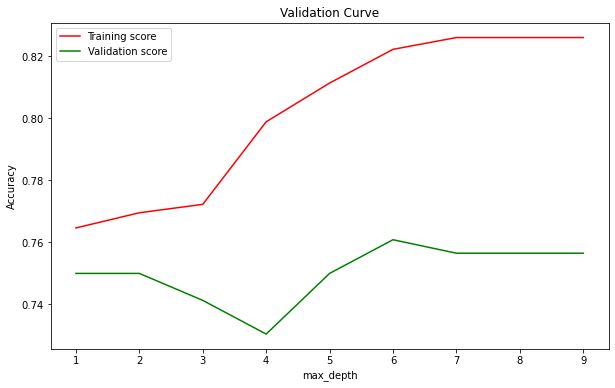

In [95]:
from sklearn.model_selection import validation_curve

param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9]
train_scores, test_scores = validation_curve(
    classifier, X_train, y_train, param_name="max_depth", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1)

# Hier plotten we de curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training score", color="r")
plt.plot(param_range, np.mean(test_scores, axis=1), label="Validation score", color="g")
plt.legend(loc="best")
plt.show()

In [97]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

X = df_train.drop('Outcome', axis=1)
y = df_train['Outcome']
X = X.drop("p_id", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Het maken van het decision tree model
classifier = DecisionTreeClassifier(max_depth = 5, min_samples_leaf= 13,  random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cross_val_scores = cross_val_score(classifier, X_train, y_train, cv=cv, scoring='accuracy')

# traing accuracy berekenen
classifier.fit(X_train, y_train)
y_train_pred = classifier.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)

# traingin en cross val accuracy printen
print("Training Accuracy:", training_accuracy)
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Accuracy:", cross_val_scores.mean())
print("Standard Deviation of Cross-Validation Scores:", cross_val_scores.std())

Training Accuracy: 0.8065217391304348
Cross-Validation Scores: [0.79347826 0.76086957 0.67391304 0.75       0.75      ]
Mean Cross-Validation Accuracy: 0.7456521739130435
Standard Deviation of Cross-Validation Scores: 0.03925102192449519
